#### Entrega TP Exclusión Mutua

Estudiante: Martín Michael De Lojo (martinmdl42@gmail.com)

---

**Ejercicio 1**

*Escribir en pseudocódigo el primer intento de solución de exclusión mutua (que usa turnos) para N procesos. Opcionalmente, implementarlo en Python o Java.*

**Solución**

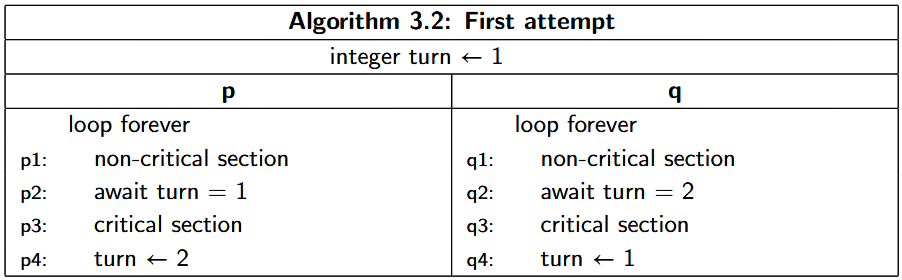

Para ejemplificar la solución por turnos para lograr exclusión mutua voy a hacer una analogía donde una familia de 3 integrantes tiene que desayunar y bañarse antes de salir a la mañana:
- desayunar (non-critical section)
- usar el baño (critical section)
- Padre: turno 1
- Madre: turno 2
- Hijo: turno 3

In [1]:
import threading
import time

turno = 1
tInicial = time.time()

def rutinaBañoPadre():

    global turno
    global tInicial

    print(f"El padre está desayunando ({(time.time() - tInicial):.4f})") # non-critical section
    time.sleep(1) # Simula el tiempo que tarda en desayunar

    while turno != 1:
        time.sleep(0.001) # Await(turn = 1) improvisado (no esta en el módulo threading)

    print(f"El padre está usando el baño ({(time.time() - tInicial):.4f})")
    time.sleep(1.5) # Simula el tiempo que tarda en bañarse

    turno = 2

def rutinaBañoMadre():

    global turno
    global tInicial

    print(f"La madre está desayunando ({(time.time() - tInicial):.4f})")
    time.sleep(1)

    while turno != 2:
        time.sleep(0.001)

    print(f"La madre está usando el baño ({(time.time() - tInicial):.4f})")
    time.sleep(1.5)

    turno = 3

def rutinaBañoHijo():

    global turno
    global tInicial

    print(f"El hijo está desayunando ({(time.time() - tInicial):.4f})")
    time.sleep(1)

    while turno != 3:
        time.sleep(0.001)

    print(f"El hijo está usando el baño ({(time.time() - tInicial):.4f})")
    time.sleep(1.5)

    turno = 1

threads = [
    threading.Thread(target=rutinaBañoPadre),
    threading.Thread(target=rutinaBañoMadre),
    threading.Thread(target=rutinaBañoHijo)
]

for thread in threads:
    thread.start()

for thread in threads:
    thread.join()

print(f"Todos terminaron de usar el baño ({(time.time() - tInicial):.4f})")

El padre está desayunando (0.0000)
La madre está desayunando (0.0020)
El hijo está desayunando (0.0020)
El padre está usando el baño (1.0026)
La madre está usando el baño (2.5034)
El hijo está usando el baño (4.0080)
Todos terminaron de usar el baño (5.5096)


---

**Ejercicio 2**

*Para Bakery de 2 procesos p y q, describir un escenario en que las variables np y nq crecen ilimitadamente.*

**Solución**

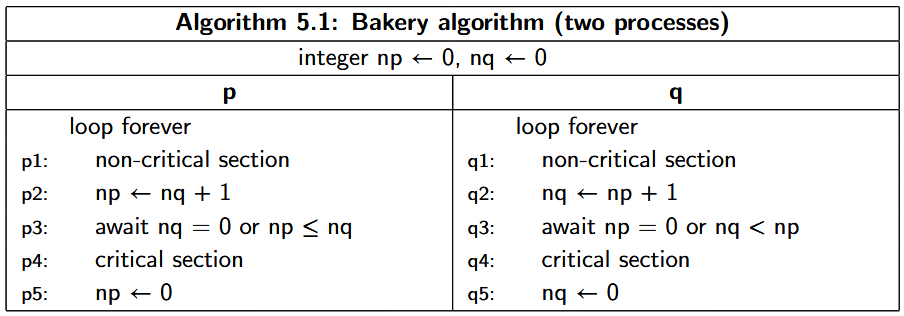

En una analogía donde dos personas quieren usar una impresora, y para decidir quién la usa primero, cada una toma un número mayor que el que ve del otro.
- ***P*** y ***Q*** son las personas.
- ***np*** y ***nq*** son los números que eligen para "turno".

La regla es: “Siempre elijo un número mayor que el número actual del otro para entrar primero.”

Entonces una situación donde ***np*** y ***nq*** crecen ilimitadamente se vería así:
1. ***np = 0***, ***nq = 0***
2. ***P*** quiere imprimir → mira ***nq=0*** → elige ***np = 0+1 = 1***
3. ***Q*** quiere imprimir → mira ***np=1*** → elige ***nq = 1+1 = 2***
4. ***P*** imprime → establece ***np=0***
5. ***P*** decide imprimir otra vez → mira ***nq=2*** → elige ***np = 2+1 = 3***
6. ***Q*** imprime → establece ***nq=0***
5. ***Q*** decide imprimir otra vez → mira ***np=3*** → elige ***nq = 3+1 = 4***
6. Así sucesivamente

---

**Ejercicio 3**

*Implementar una versión de Bakery para 3 procesos, lo más simple que se pueda.*

**Solución**

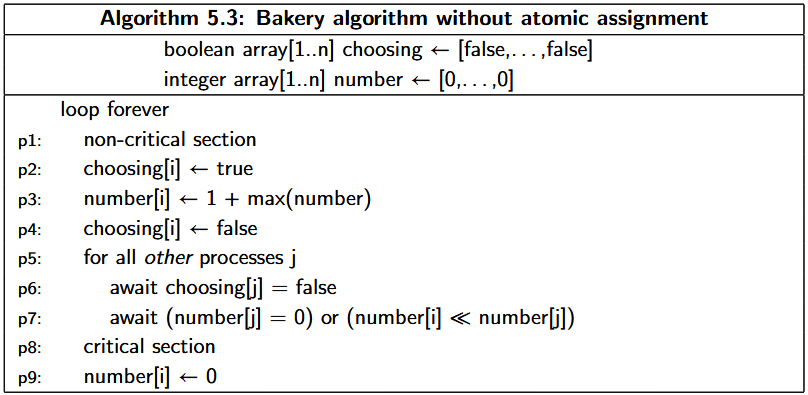

In [2]:
tInicial = time.time()

N = 3 # Cantidad de procesos
choosing = [False] * N
number = [0] * N

def bakery(id: int):

    for _ in range(2):  # cada proceso intenta ejecutar SC 2 veces

        # ----- Elegir número -----
        choosing[id] = True
        number[id] = 1 + max(number)
        choosing[id] = False

        # ----- Esperar turno -----
        for j in range(N):
            if j == id:
                continue
            while choosing[j]:
                pass  # espero a que termine de elegir
            while number[j] != 0 and (number[j], j) < (number[id], id):
                pass  # espero si otro tiene prioridad

        # ----- Sección crítica -----
        print(f"{(time.time() - tInicial):.2f}: Proceso {id} ENTRA a la SC")
        time.sleep(1)
        print(f"{(time.time() - tInicial):.2f}: Proceso {id} SALE de la SC")
    
        number[id] = 0

threads = [threading.Thread(target=bakery, args=(i,)) for i in range(N)]

for t in threads:
    t.start()

for t in threads:
    t.join()

0.00: Proceso 0 ENTRA a la SC
1.02: Proceso 0 SALE de la SC
1.10: Proceso 1 ENTRA a la SC
2.12: Proceso 1 SALE de la SC
2.22: Proceso 2 ENTRA a la SC
3.22: Proceso 2 SALE de la SC
3.33: Proceso 0 ENTRA a la SC
4.34: Proceso 0 SALE de la SC
4.37: Proceso 1 ENTRA a la SC
5.38: Proceso 1 SALE de la SC
5.39: Proceso 2 ENTRA a la SC
6.40: Proceso 2 SALE de la SC


---

**Ejercicio 4**

*Sort + merge (del modo en que se explicó en la clase).*

**Solución**

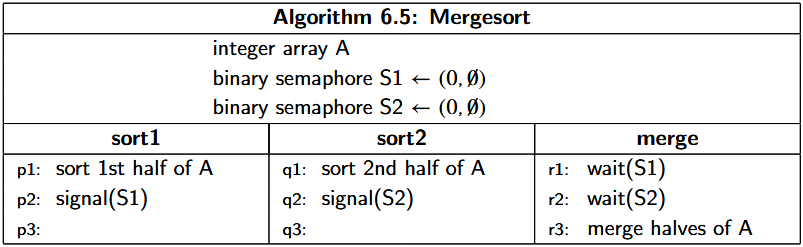

In [3]:
import random
import threading

def sort1(list):
    list.sort() # async
    s1.release()

def sort2(list):
    list.sort() # async
    s2.release()

def merge(listA, listB):
    s1.acquire()
    s2.acquire()
    newList = listA + listB # critical section
    newList.sort()
    print(newList)
    return newList

listaDesordenada = [random.randint(0, 1000) for _ in range(100)] # 100 enteros entre 0 y 1000

s1 = threading.Semaphore(0)
s2 = threading.Semaphore(0)

centro = len(listaDesordenada) // 2

half1 = listaDesordenada[:centro]
half2 = listaDesordenada[centro:]

threads = [
    threading.Thread(target=sort1, args=(half1,)),
    threading.Thread(target=sort2, args=(half2,)),
    threading.Thread(target=merge, args=(half1, half2))
]

for t in threads: t.start()
for t in threads: t.join()

[2, 7, 12, 37, 42, 45, 52, 54, 56, 64, 78, 83, 88, 89, 111, 124, 128, 128, 134, 140, 157, 163, 169, 181, 193, 194, 200, 208, 268, 275, 276, 285, 299, 300, 305, 309, 327, 328, 349, 350, 358, 374, 386, 414, 415, 421, 431, 432, 437, 450, 460, 474, 480, 503, 525, 544, 546, 551, 553, 580, 614, 616, 624, 638, 638, 649, 656, 661, 664, 668, 673, 682, 698, 701, 704, 729, 737, 742, 754, 754, 765, 767, 769, 795, 816, 835, 850, 855, 857, 897, 898, 918, 932, 935, 943, 946, 950, 985, 985, 997]
